# EDA for Online Shopper's Intention 

This is the exploratory data analysis portion of Capstone 2. 

By Lisa Patel

In [ ]:
data = 'WranglingDf.csv'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### To recap: 

The dataset has 10 numerical features and 8 categorical features. Taking a look at the dataset description:

Column Descriptions:

Administrative: Number of pages of this type (administrative) that the user visited.

Administrative_Duration: Amount of time spent in this category of pages.

Informational: Number of pages of this type (informational) that the user visited.

Informational_Duration: Amount of time spent in this category of pages.

ProductRelated: Number of pages of this type (product related) that the user visited.

ProductRelated_Duration: Time spent in this category of pages.

BounceRates: The percentage of people who leave your website after visiting only a single page. Here are some scenarios that count as a bounce on your website:
Someone clicks the back button after viewing a single page.
Someone exits their browser after viewing a single page.
A user clicks to another website that takes them elsewhere after viewing only a single page on your site

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction. This value is intended to give you an idea of which page in your site contributed more to your site's revenue.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into. Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

### Correlation Matrix Overview

We begin exploring the data with a correlation matrix, which would give us a rough guide for any promising features that might correlate with our target. 

[Text(0.5, 0, 'Administrative'),
 Text(1.5, 0, 'Administrative_Duration'),
 Text(2.5, 0, 'Informational'),
 Text(3.5, 0, 'Informational_Duration'),
 Text(4.5, 0, 'ProductRelated'),
 Text(5.5, 0, 'ProductRelated_Duration'),
 Text(6.5, 0, 'BounceRates'),
 Text(7.5, 0, 'ExitRates'),
 Text(8.5, 0, 'PageValues'),
 Text(9.5, 0, 'SpecialDay'),
 Text(10.5, 0, 'OperatingSystems'),
 Text(11.5, 0, 'Browser'),
 Text(12.5, 0, 'Region'),
 Text(13.5, 0, 'TrafficType'),
 Text(14.5, 0, 'Weekend'),
 Text(15.5, 0, 'Revenue')]

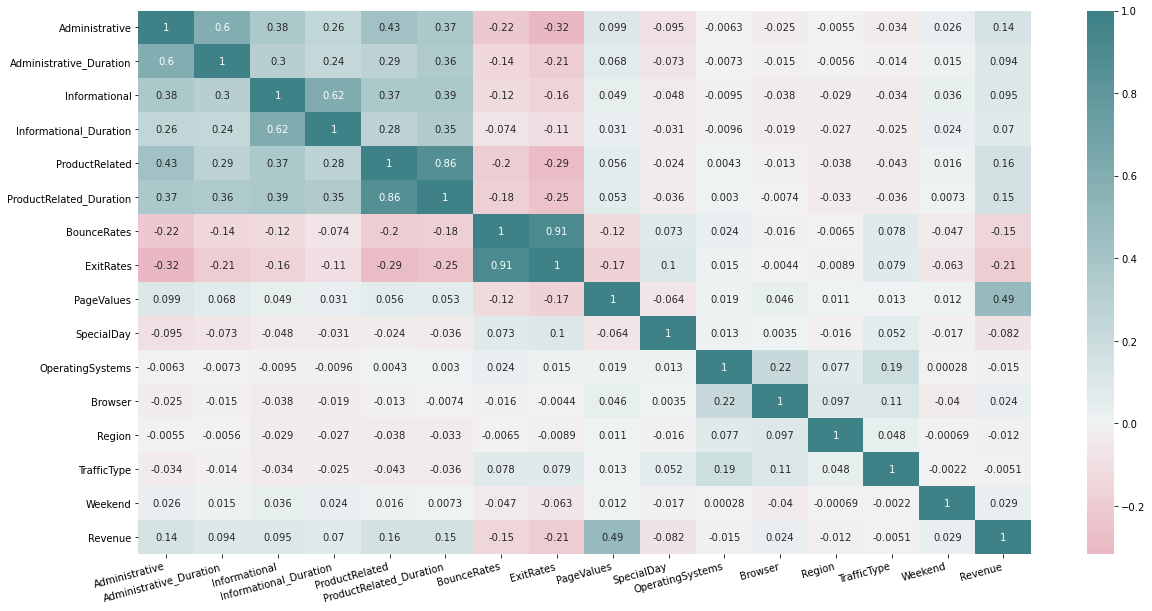

In [5]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(),cmap=sns.diverging_palette(5, 200, n=200),center = 0,annot=True)
heatmap.se
t_xticklabels(heatmap.get_xticklabels(),rotation=15,horizontalalignment='right')


The one feature that jumps out from this correlation plot is **PageValues**.

### When are people most likely to buy? Which month?

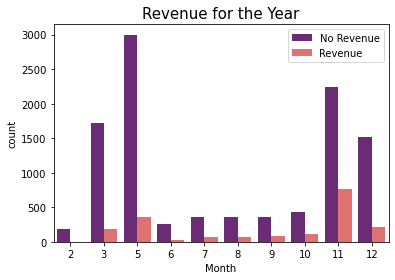

In [22]:
#Revenue for a year
sns.countplot(x = df['Month'],hue=df.Revenue, palette = 'magma')
plt.title('Revenue for the Year', size = 15)
L=plt.legend(loc = 'best')
L.get_texts()[0].set_text('No Revenue')
L.get_texts()[1].set_text('Revenue')
plt.show()

In [16]:
#transfer Month abb. to number 1-12
df.replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)

The dataset does not have information on certain months.

### Weekend or Weekday?


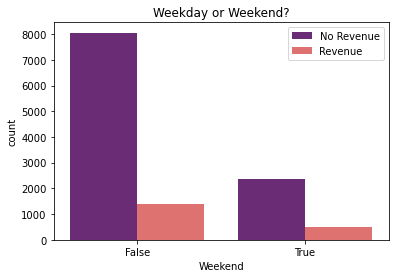

In [21]:
sns.countplot(x = df['Weekend'],hue=df.Revenue, palette = 'magma')
plt.title('Weekday or Weekend?', size = 12)
L=plt.legend(loc = 'best')
L.get_texts()[0].set_text('No Revenue')
L.get_texts()[1].set_text('Revenue')
plt.show()

The chart above indicates that people tend to make purchases on the weekdays and the chart below depicts that most of the customers, whether they drive in revenue or not, are returning customers. This suggests that the firm has dealt with good retention with customers, but there is still room for improvement on conversion rates. Combining these finding could be an opportunity of growth by trying to encourage more returning customers to browse the site on weekends. This could be done by  promoting a sale only available on the weekends through various traffic sources.  

### Who are the customers?

Text(0.5, 1.0, 'Sales per Visitor Type')

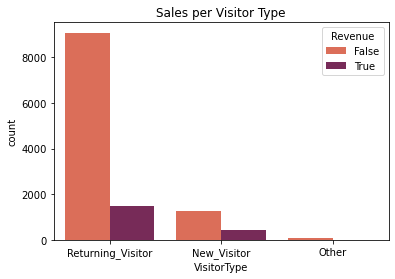

In [8]:
sns.countplot(data = df, x ='VisitorType',hue = 'Revenue',palette = "rocket_r").set_title('Sales per Visitor Type')

### Which source of traffic to focus on?

Text(0.5, 1.0, 'Traffic volume around Special Day per Traffic Type')

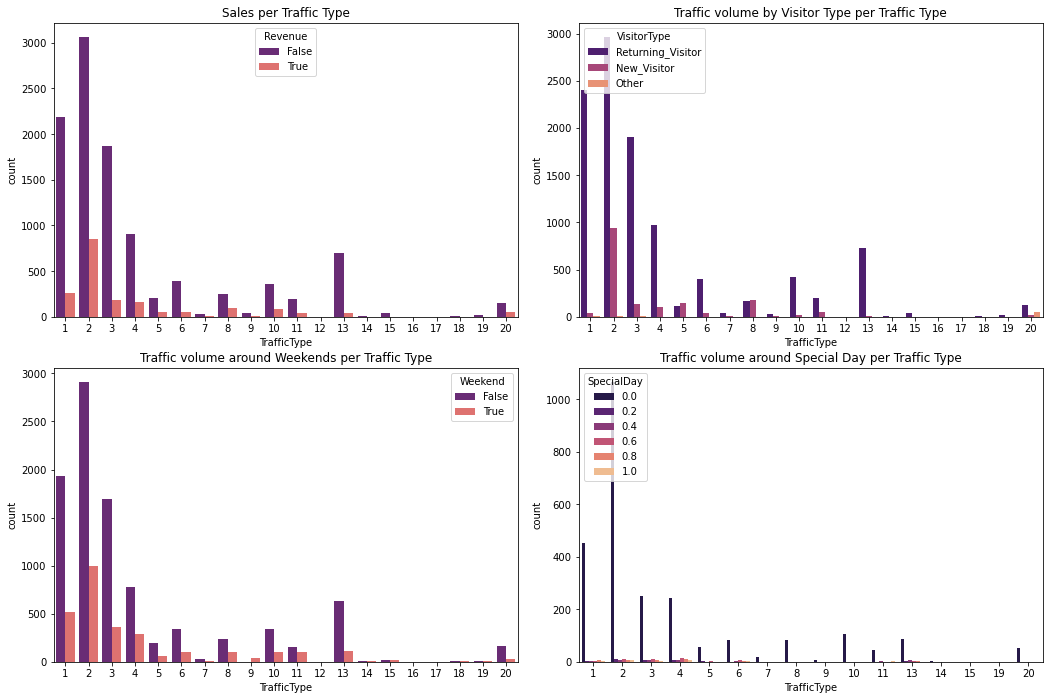

In [20]:
fig, ax1 = plt.subplots(2,2,figsize = (15,10))
plt.tight_layout(pad= 3)


sns.countplot(data = df, x ='TrafficType',hue = 'Revenue',ax =ax1[0,0],
              palette="magma").set_title('Sales per Traffic Type')

sns.countplot(data = df, x ='TrafficType',hue = 'VisitorType',ax =ax1[0,1],
             palette="magma").set_title('Traffic volume by Visitor Type per Traffic Type')

sns.countplot(data = df, x ='TrafficType',hue = 'Weekend',ax =ax1[1,0],
              palette="magma").set_title('Traffic volume around Weekends per Traffic Type')

sns.countplot(data = df2, x ='TrafficType',hue = 'SpecialDay',ax =ax1[1,1],
             palette="magma").set_title('Traffic volume around Special Day per Traffic Type')

This shows that traffic types 1 through 4 dominate how people arrive to the site, especially traffic type 2. Since we don't have the necessary data to say which platforms these are, all we say is that any future investment into advertising should go toward traffic type 2. It also makes sense since both returning visitors and new visitors both use traffic type 2 on weekdays, weekends and speicial days. 



### Sales per various dimensions

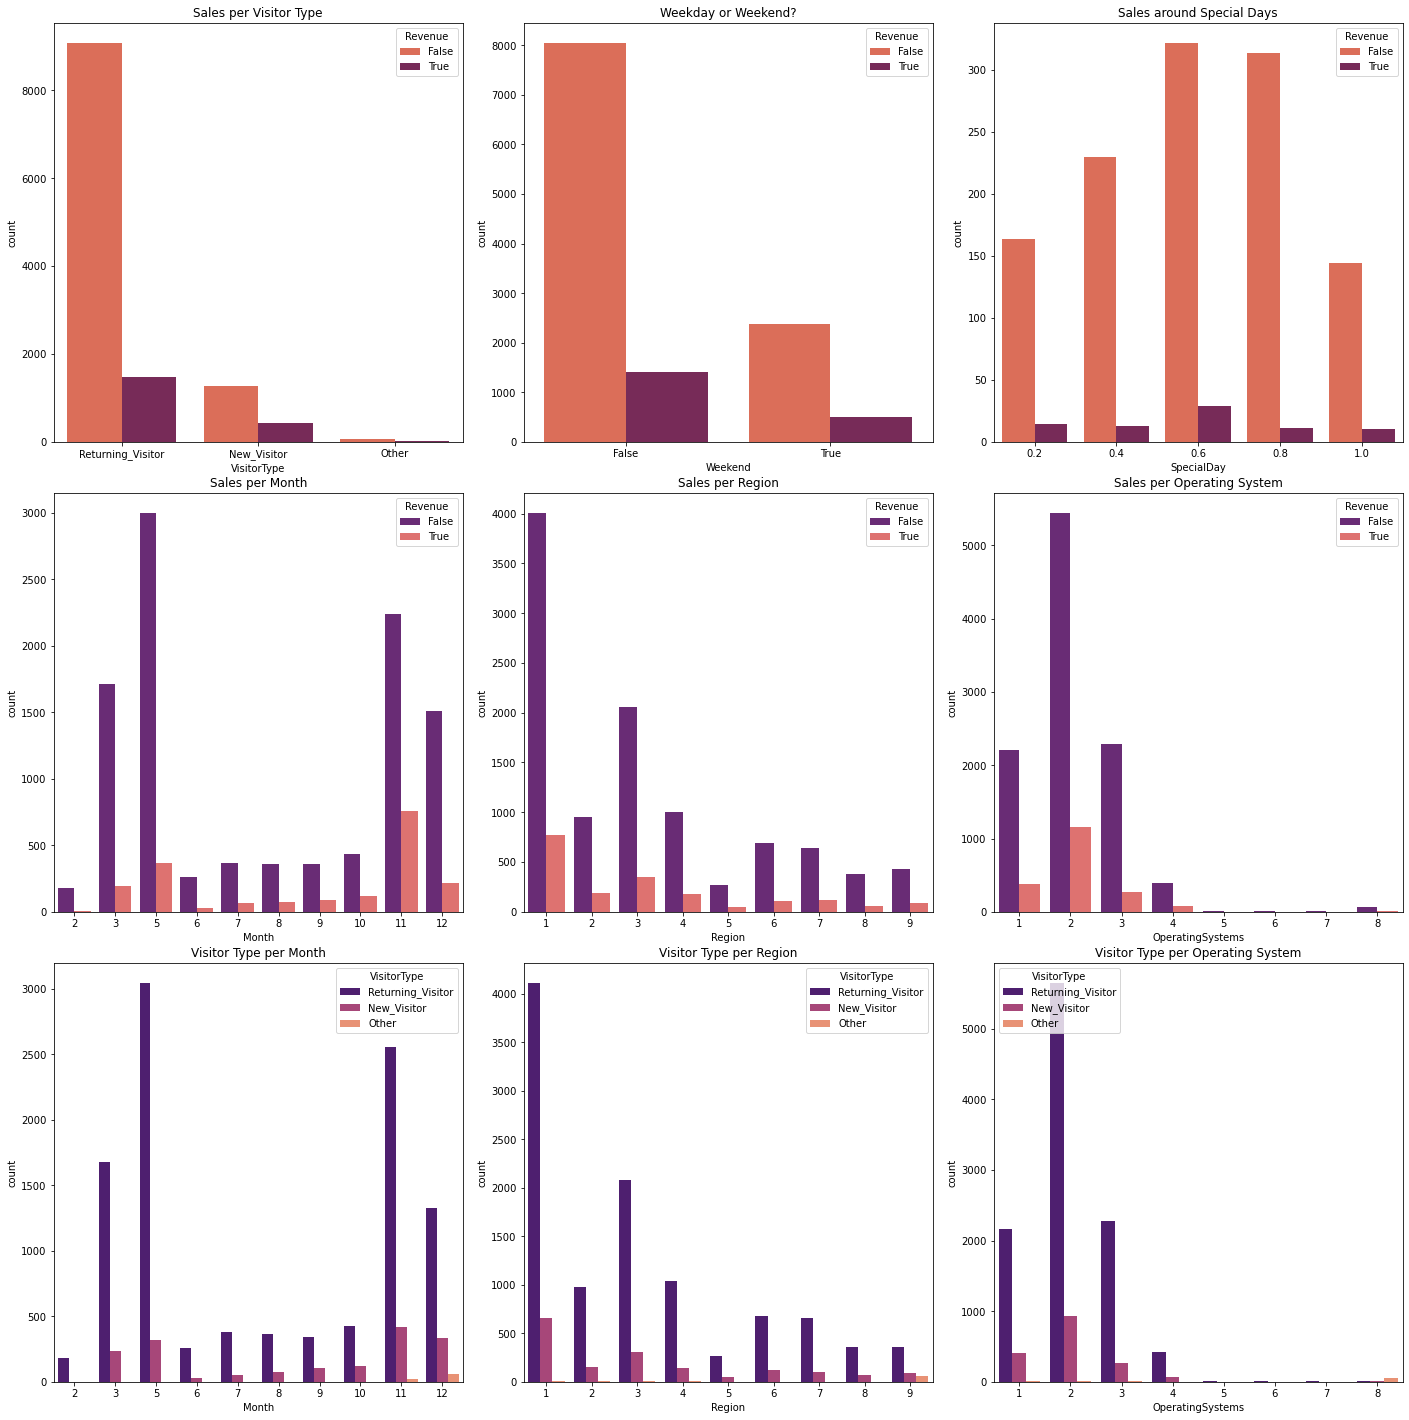

In [23]:
#sales performance 
fig, ax = plt.subplots(3,3,figsize = (20,20))
plt.tight_layout(pad= 3)

sns.countplot(data = df, x ='Month',hue = 'Revenue',ax =ax[1,0],
             palette = "magma").set_title('Sales per Month')

sns.countplot(data = df, x ='Weekend',hue = 'Revenue',ax =ax[0,1],
             palette = "rocket_r").set_title('Weekday or Weekend?')
df2 = df[df['SpecialDay']!=0]

sns.countplot(data = df2, x ='SpecialDay',hue = 'Revenue',ax =ax[0,2],
             palette = "rocket_r").set_title('Sales around Special Days')

sns.countplot(data = df, x ='VisitorType',hue = 'Revenue',ax =ax[0,0],
             palette = "rocket_r").set_title('Sales per Visitor Type')

sns.countplot(data = df, x ='Region',hue = 'Revenue',ax =ax[1,1],
             palette = "magma").set_title('Sales per Region')

sns.countplot(data = df, x ='OperatingSystems',hue = 'Revenue',ax =ax[1,2],
             palette = "magma").set_title('Sales per Operating System')

#visitor type by 3 dimensions
sns.countplot(data = df, x ='Month',hue = 'VisitorType',ax =ax[2,0],
             palette = "magma").set_title('Visitor Type per Month');

sns.countplot(data = df, x ='Region',hue = 'VisitorType',ax =ax[2,1],
             palette = "magma").set_title('Visitor Type per Region');

sns.countplot(data = df, x ='OperatingSystems',hue = 'VisitorType',ax =ax[2,2],
             palette = "magma").set_title('Visitor Type per Operating System');

This set of figures gives an overview of how revenue is impacted by these 6 dimensions: 

- **Visitor Type**: The majority of sales came from returning visitors. This can be a new opportunity of growth, if a system can be implemented to boost sales. The retailer could engage loyal customers in conversion of other customers by offering discounts for friends joining in, and for new customers making a purchase in this manner, offer discounts.

- **Month**: The highest transaction volume took place in March, May, November and December. Sales in November account for nearly half of total sales, so what strategy being used should be maintained or improved upon. Zero sales in February is also concerning and needs to be evaluated more.  

- **Region**: Regions 1 and 3 had the highest transaction volume. 

- **Operating Systems**: More visitors were likely to use operating system 2 more than the others. Information on the specific operating system would be useful. 

- **Weekend**: Tranactions were more likely to occur on weekdays. As mentioned before, new strategies, such as weekend/special day sales or an increase in sale promotion, might result in larger revenue. 

- **Special Days**: Visitors often bought merchandise during the week of the special day. Special days could also be a returning customer's birthday, so offering birthday discounts increases revenue. 




### In which range Bounce/Exit Rates could facilitate purchase behavior?

Text(0.5, 1.0, 'Relationship between exit rates and bounce rates')

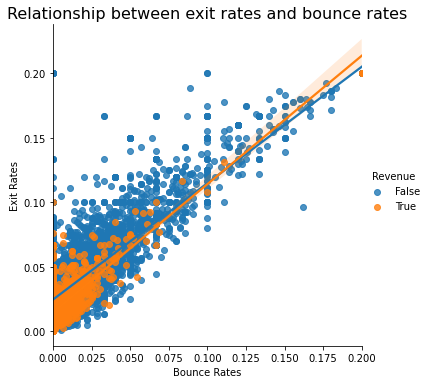

In [15]:
ax = sns.lmplot(x='BounceRates', y = 'ExitRates', hue='Revenue', data=df)
la
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.title('Relationship between exit rates and bounce rates', size = 16)


A better understanding of the difference between bounce rate and exit rate will be helpful in our analysis. In web analytics, the bounce rate is the percentage of visitors who arrive at a landing page but bounce off without navigating to a second page on that website. It is a performance level indicator of an entire website regardless of the landing page since it shows the percentage of visitors of who found nothing interesting on the page. It is calculated by diving the total number of single-page visits by the total number of visitors to that website. 

Exit rate, on the other hand, represented the percentage of visitors, who exited the site from a particular page, after visiting any number of pages on that site. It is specific to the landing page and that page only. This is calculated by dividing the total number of visitors to a webpage by the total number of visitors who left the website after visiting that page. 

To put it all together, if a website has high bounce and low exit rate, there is something wrong with it. If it has a high bounce and high exit, the page needs urgent attention. According to Upside Business, bounce rates are typically between 40-60% and higher than 70% is alarming. A bounce rate lower than 10%, as is our case, is also concerning and is often the cause of Google Analytics code being inserted twice. Hence more investigation is needed on these data. Given that there is indeed no way to check for this error, we should look for ways to optimize bounce rates and exit rates to ensure saving sales and securing customer loyalty.

We can easily say there is a positive linear relationship between Exit Rate and Bounce Rate, i.e. customers who visit pages of higher average bounce rates are more likely to exit the website which makes sense. To be more precise, for customers who finally placed the order, most of them visited pages of bounce rate and exit rate between (0,0.075)

We can optimize these rates by: 

1. Creating better landing pages which are UI friendly. Examples of this could mean that the descriptions are short and informative, the icons are used in an appropriate manner, and that the entire purchasing process is as smooth as possible for the consumer. 

2. Categorizing email retargeting, so that there exists a personalized touch to the mail. Personalization brings in large scale loyalty and in turn better retention.

3. Introducing pop-ups that offers qualitative discounts or personalized queries when a customer bounces multiple times and/or tries to leave the website.


### Conclusion

To wrap up, exploring this dataset provides us many insights into this retailer's transactions. We learned who the visitors were, when they were more likely to make purchases, how they arrived at the site, which region they were in, and thier operating system perference. Along the way, we also detailed additional opportunities for growth and improvement in sales. 